In [3]:
import pandas as pd
import utils

TS = 48


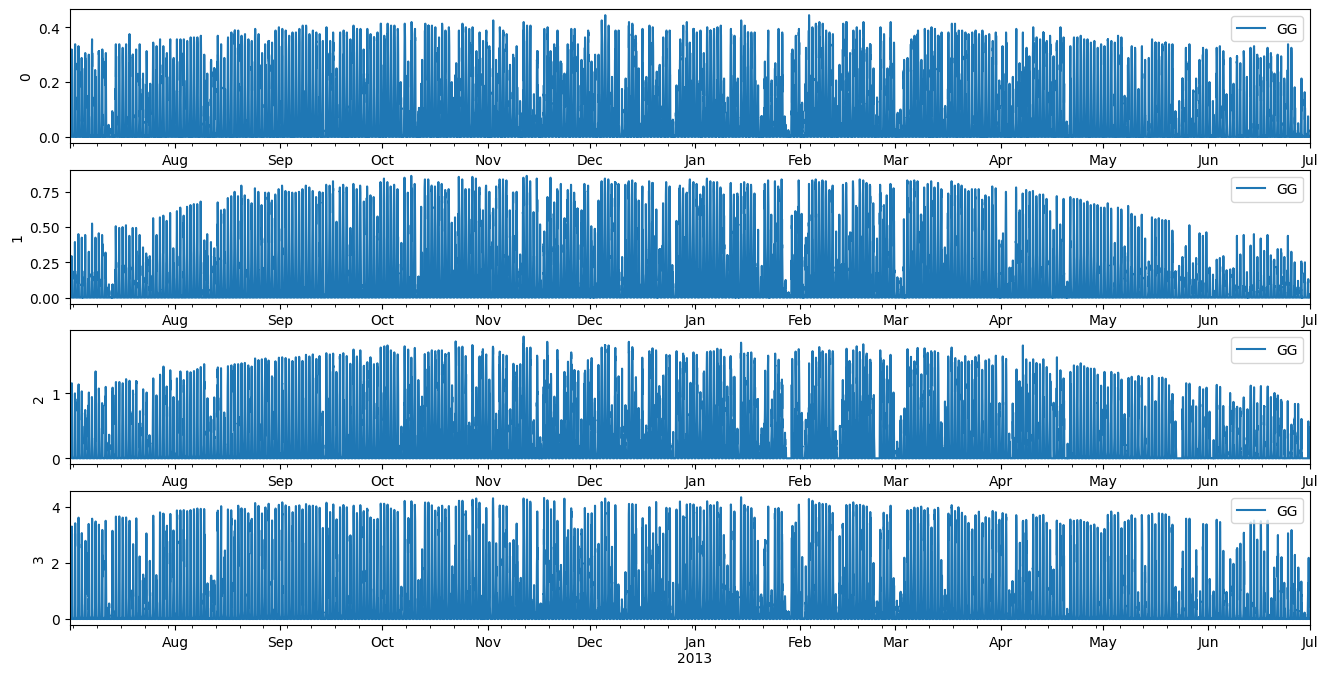

In [3]:
import matplotlib.pyplot as plt

samples = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
samples = [221, 202, 239, 273]
samples = [25, 93, 1, 75]

# samples = list(range(291, 301))
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

fig, axes = plt.subplots(nrows=len(df_raw), ncols=1, figsize=(16,8))
for i, df in enumerate(df_raw):
    df.columns.name = None

    df[['GG']].plot(ax=axes[i])
    axes[i].set_ylabel(f'{i}')
    

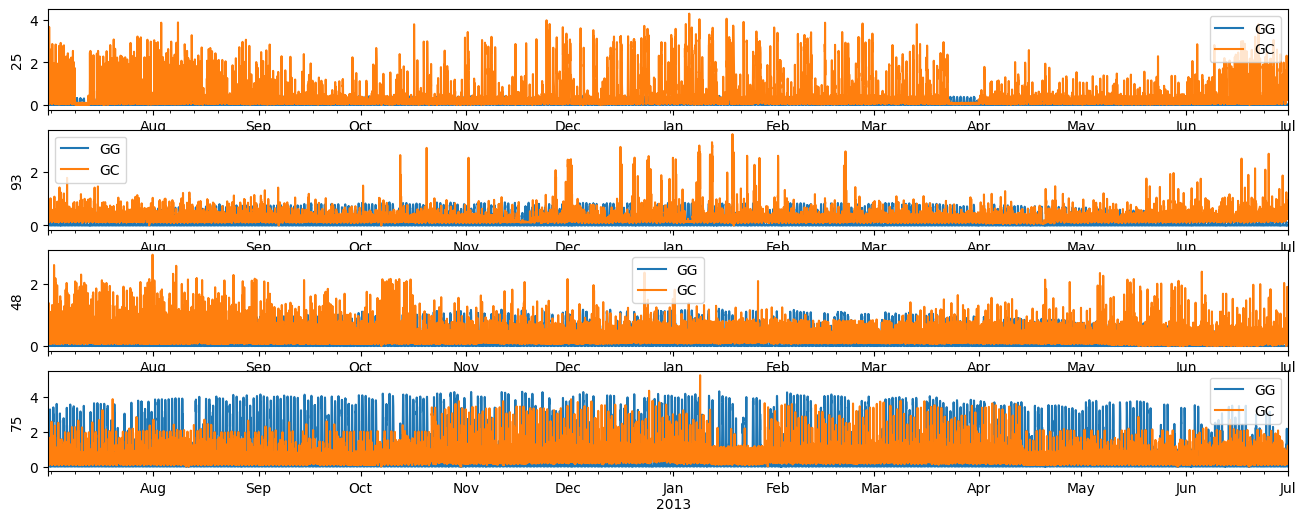

In [ ]:
selected = [25, 93, 48, 75]
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

df_sel = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, s in enumerate(selected):
    df = df_raw[selected.index(s)]
    df_sel.append(df)
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))

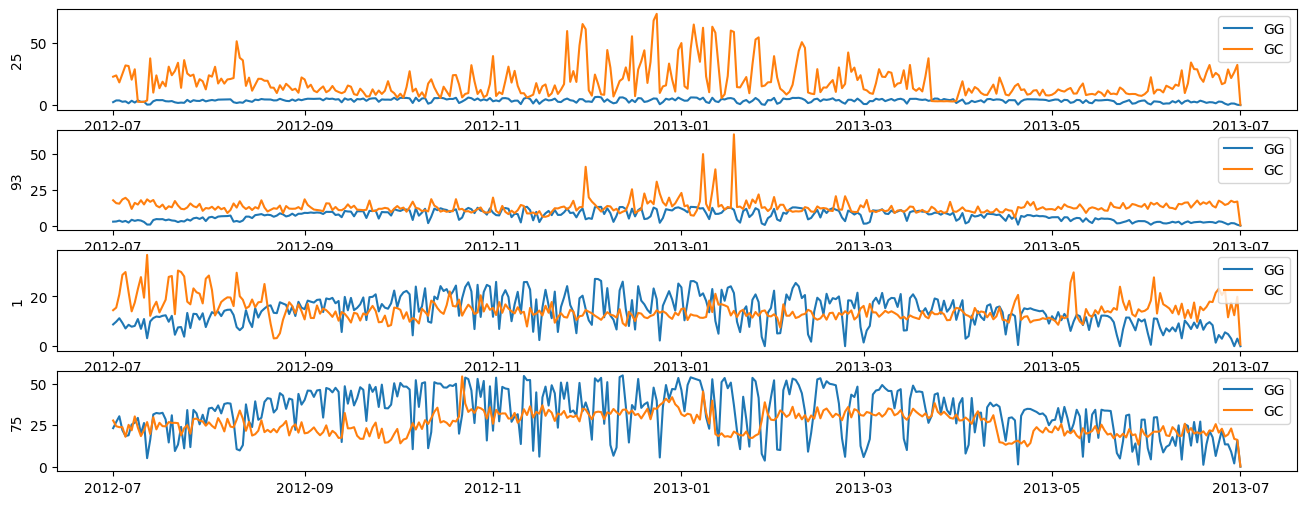

In [ ]:
df_daily = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df1 = df.groupby(df.index.date).sum()
    df_daily.append(df1)
    df1[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))
    

68.3% -0.31161166098254395
86.6% -0.6224214298299804
95.0% -0.9332311986774167
99.0% -1.5548507363722894
scss 0.623200695420299 0.12494980416263346
68.3% -0.21669114807615344
86.6% -0.3883227380959653
95.0% -0.5599543281157772
99.0% -0.9032175081554009
scss 0.5261533417856833 0.28266973067883916
68.3% -0.5952415710287773
86.6% -0.8975620426162253
95.0% -1.1998825142036733
99.0% -1.8045234573785693
scss 0.24605846840606838 0.23838402510358192
68.3% -1.509997957717916
86.6% -2.1947951957092937
95.0% -2.879592433700672
99.0% -4.249186909683427
scss 0.2051902749255774 0.2577620340391802


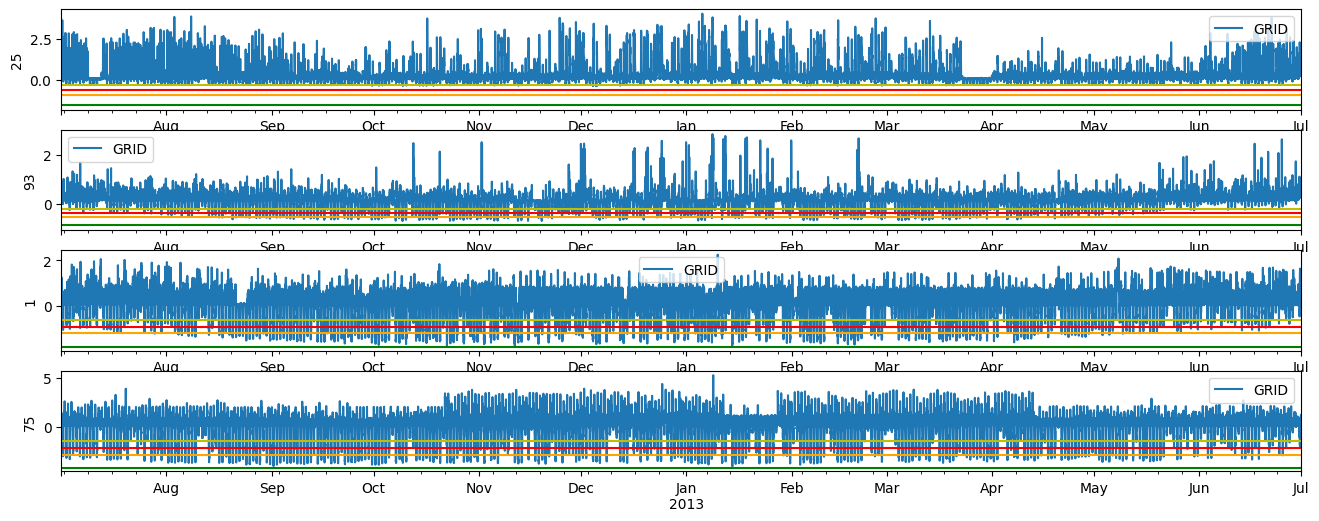

In [ ]:
import numpy as np

fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df['GRID'] = df['GC'] - df['GG']
    df['PAT'] = np.where(df['GRID'] <= 0, 1, -1)
    
    gd_export = df[df['GRID']<0]['GRID'].sum()
    gd_import = df[df['GRID']>0]['GRID'].sum()
    df[['GRID']].plot(ax=axes[i])

    d_10 = df['GRID'].mean()-1.0*df['GRID'].std()
    d_15 = df['GRID'].mean()-1.5*df['GRID'].std()
    d_20 = df['GRID'].mean()-2.0*df['GRID'].std()
    d_30 = df['GRID'].mean()-3.0*df['GRID'].std()
    print('68.3%', d_10)
    print('86.6%', d_15)
    print('95.0%', d_20)
    print('99.0%', d_30)

    axes[i].axhline(d_10, color='y')
    axes[i].axhline(d_15, color='r')
    axes[i].axhline(d_20, color='orange')
    axes[i].axhline(d_30, color='g')
    
    axes[i].set_ylabel('{}'.format(s))
    sc = 1 + gd_export/df['GG'].sum()
    ss = 1 - gd_import/df['GC'].sum()
    print('scss', sc, ss)
    

In [11]:
import numpy as np
    
def sim_ss_sc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    return grid_imp, grid_exp


2 An exception occurred.


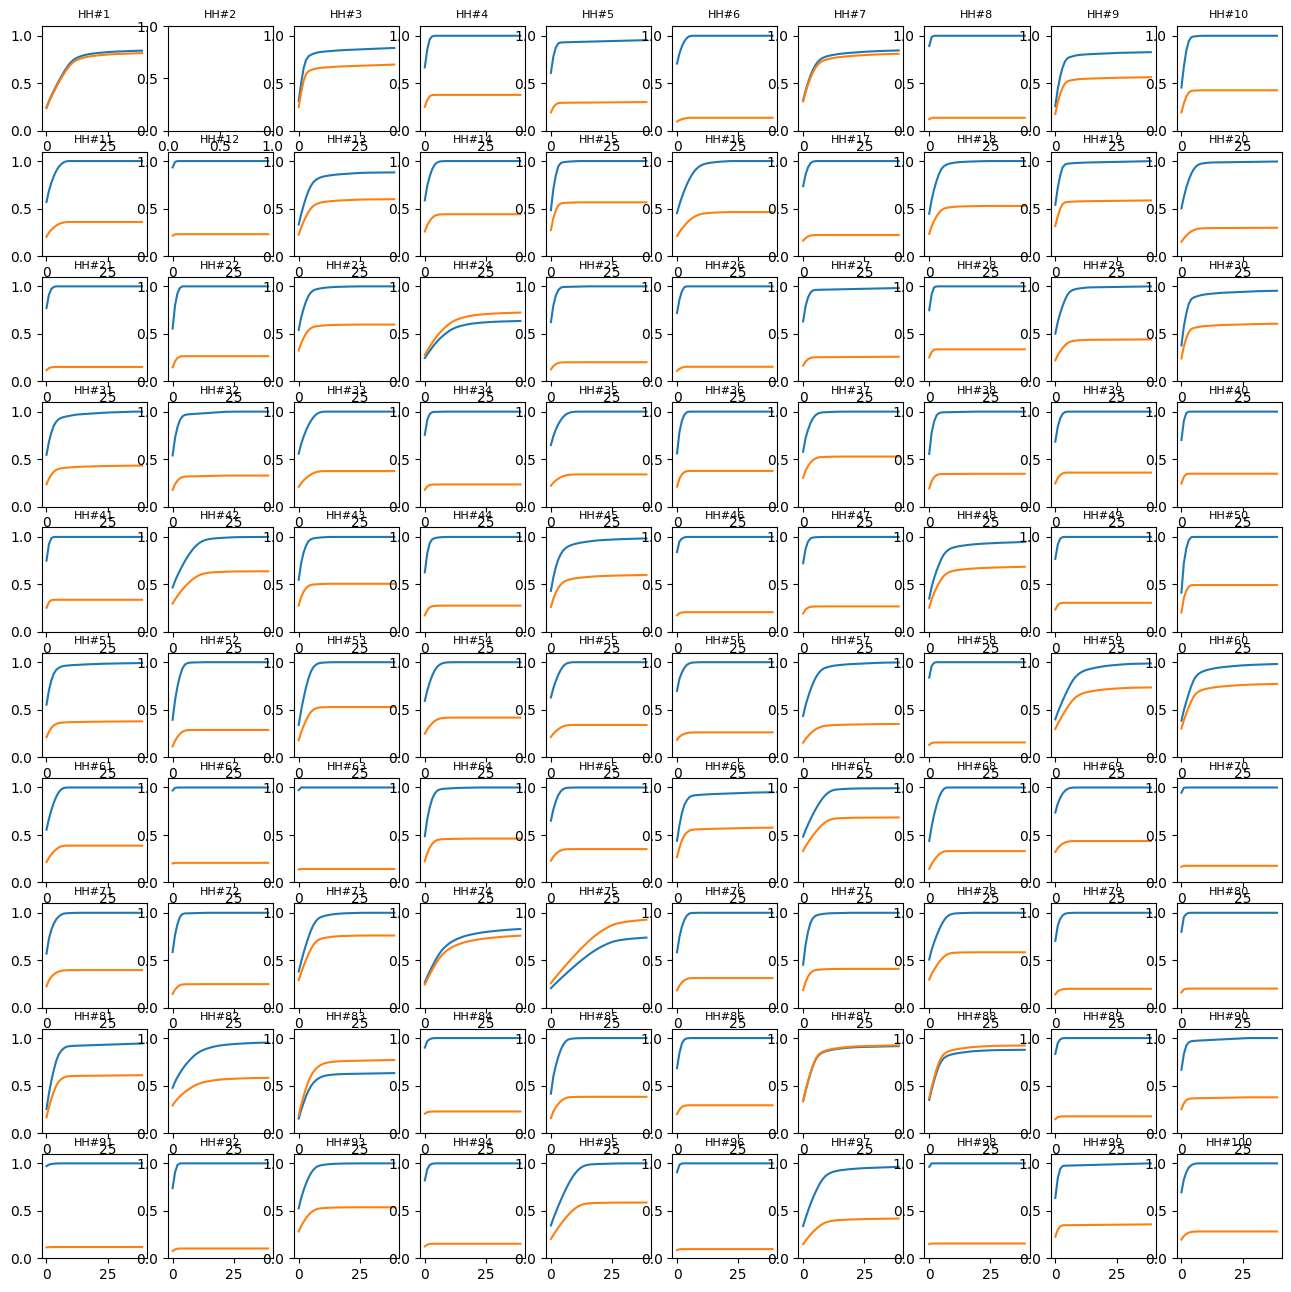

In [ ]:
import pandas as pd
import utils
import matplotlib.pyplot as plt

selected = list(range(1, 101))
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(16,16))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    try:
        sc_list = []
        ss_list = []
        for c in range(40):
            gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
            sc = 1 - gexp/df['GG'].sum()
            ss = 1 - gimp/df['GC'].sum()
            sc_list.append(sc)
            ss_list.append(ss)
        axes[i//10, i%10].plot(sc_list, label='SC')
        axes[i//10, i%10].plot(ss_list, label='SS')
        # axes[i//10, i%10].set_xlabel('Capacity[kwh]')
        # axes[i//10, i%10].set_ylabel('SC and SS[%]')
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)
        # axes[i//10, i%10].legend()
        axes[i//10, i%10].set_ylim((0, 1.1))
    except:
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)

25 (-2, 6, 13, 28) 0.20049689462936923
[0.6232006954203018, 0.7972841018050677, 0.902786526819054, 0.9593760599800008, 0.9858427052084572, 0.9930002775220366, 0.9941155049652951, 0.9947395624549393, 0.9953636199445837, 0.995987677434228, 0.9966117349238723, 0.9972357924135167, 0.997859849903161, 0.9984839073928052, 0.9991079648824496, 0.9997320223720939, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.1249498041626439, 0.15985298654929214, 0.18100589514046284, 0.1923519208077572, 0.1976584009873209, 0.19909347200927874, 0.19931707164845736, 0.19944219323720114, 0.19956731482594514, 0.19969243641468903, 0.1998175580034

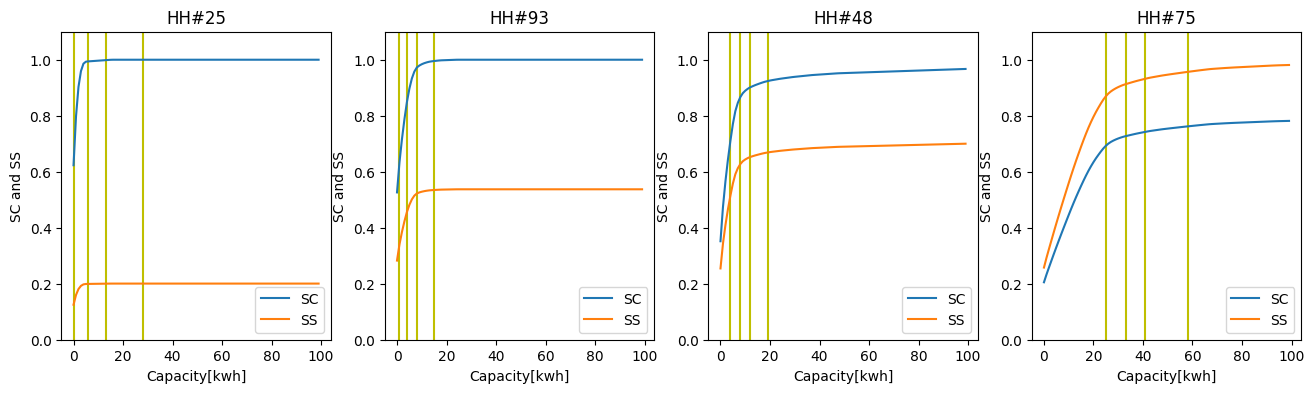

In [ ]:
import matplotlib.pyplot as plt

selected = [25, 93, 48, 75]
ws = [1, 1, 1, 1] 
# ws = [5.05, 1.85, 1.4, 0.77]
# selected = [221, 202, 239, 273]
# selected = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)
ncols = 4
fig, axes = plt.subplots(nrows=len(selected)//ncols, ncols=ncols, figsize=(16,4))
if axes.ndim ==1:
    axes = np.reshape(axes, (-1, ncols))

for i, (s, df) in enumerate(zip(selected, df_sel)):
    sc_list = []
    ss_list = []

    stds = utils.cal_stds(df)
    print(s, stds, df['GG'].sum()*ws[i]/df['GC'].sum())
    for p in stds:
        axes[i//ncols, i%ncols].axvline(max(0,p), color='y')

    for c in range(0, 60):
        gimp, gexp = sim_ss_sc(df['GG'].values*ws[i], df['GC'].values, c)
        sc = 1 - gexp/df['GG'].sum()/ws[i]
        ss = 1 - gimp/df['GC'].sum()
        sc_list.append(sc)
        ss_list.append(ss)
    axes[i//ncols, i%ncols].plot(sc_list, label='SC')
    axes[i//ncols, i%ncols].plot(ss_list, label='SS')
    axes[i//ncols, i%ncols].set_ylabel('SC and SS')
    axes[i//ncols, i%ncols].set_title(f'HH#{s}')
    axes[i//ncols, i%ncols].legend()
    axes[i//ncols, i%ncols].set_ylim((0, 1.1))

    axes[-1, i%ncols].set_xlabel('Capacity[kwh]')

    print(sc_list)
    print(ss_list)
    print(np.array(sc_list)+np.array(ss_list))

GG, GC, mean, std 3.721459016393443 18.56118032786885 -14.83972131147541 19.08987326988805
68.3% -2.113139131550044
86.6% 4.250151958412639
95.0% 10.613443048375322
95.0% 10.613443048375322
12.537999999999998 1362.054
GG, GC, mean, std 7.033967213114754 13.092825136612019 -6.058857923497269 9.381708409697813
68.3% 0.19561434963460655
86.6% 3.3228504862005446
95.0% 6.450086622766482
95.0% 6.450086622766482
86.34899999999999 2574.432
GG, GC, mean, std 13.975975409836067 14.42591256830601 -0.44993715846994525 12.88611660340045
68.3% 8.140807243797022
86.6% 12.436179444930506
95.0% 16.731551646063988
95.0% 16.731551646063988
1183.69 5115.207
GG, GC, mean, std 32.95318032786886 26.23222677595628 6.720953551912568 20.911391708202963
68.3% 20.66188135738121
86.6% 27.63234526011553
95.0% 34.60280916284985
95.0% 34.60280916284985
3614.302 12060.864000000001


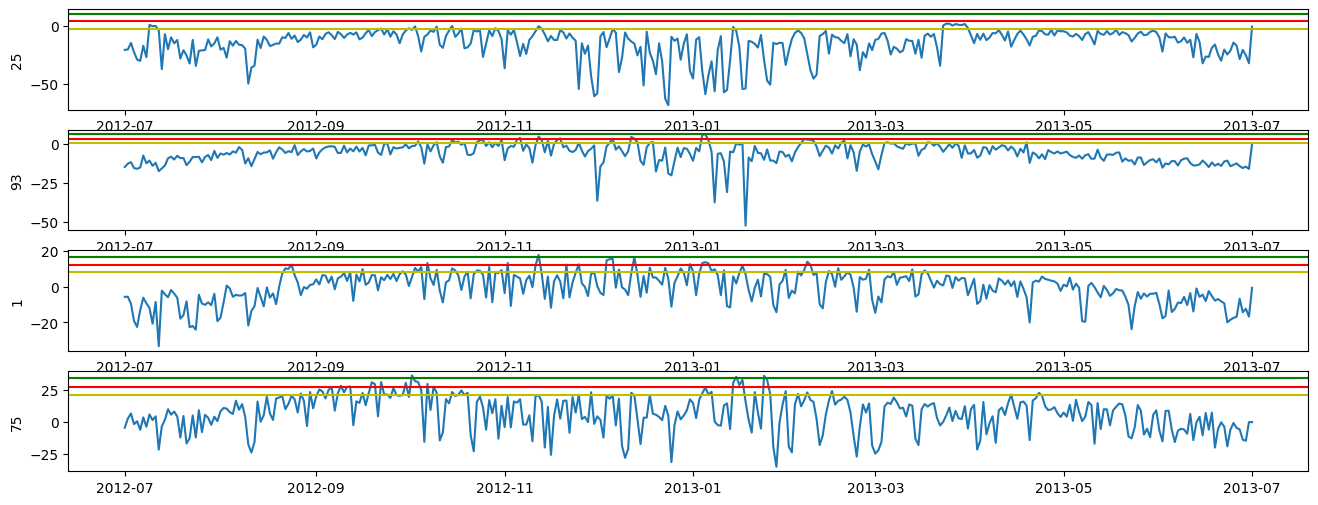

In [16]:
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_daily)):
    df['Diff'] = df['GG'] - df['GC']
    df['Diff'].plot(ax=axes[i])
    
    print('GG, GC, mean, std', df['GG'].mean(), df['GC'].mean(), df['Diff'].mean(), 1.5*df['Diff'].std())
    d_10 = df['Diff'].mean()+1.0*df['Diff'].std()
    d_15 = df['Diff'].mean()+1.5*df['Diff'].std()
    d_20 = df['Diff'].mean()+2.0*df['Diff'].std()
    d_30 = df['Diff'].mean()+2.0*df['Diff'].std()
    print('68.3%', d_10)
    print('86.6%', d_15)
    print('95.0%', d_20)
    print('95.0%', d_30)

    axes[i].axhline(d_10, color='y')
    axes[i].axhline(d_15, color='r')
    axes[i].axhline(d_20, color='orange')
    axes[i].axhline(d_30, color='g')
    axes[i].set_ylabel('{}'.format(s))

    print(df[df['Diff']>0]['Diff'].sum(), df['GG'].sum())


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import scipy

C_b = 1
C_p = 100
MAX_BATT = 60

def factor_sssc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    sc = 1 - grid_exp/pv.sum()
    ss = 1 - grid_imp/ld.sum() 

    return sc, ss

def cost_fun(x, df, budget):
    w = x[1]/df['GG'].mean()
    sc, ss = factor_sssc(df['GG'].values*w, df['GC'].values, x[0])
    cost = -(sc + ss)
    return cost

def constraint_0(x, df, budget):
    cost = (C_b*x[0] + C_p*x[1])
    # print('constraint_0', x, cost)
    return cost - budget

def optimize_scss(s, df):
    w = df['GC'].mean()
    avg_gg = df['GG'].mean()
    x0 = [1, 0.2*w]
    bnds = ((1, MAX_BATT), (0.2*w, 1.2*w))
    min_budget = 1*C_b + 0.2*w*C_p
    max_budget = MAX_BATT*C_b + 1.2*w*C_p
    print('budget', min_budget, max_budget)
    optimal_values = []
    pre_cost = 0
    
    for b in range(int(min_budget), int(max_budget), 5):
        arguments = (df,b)
        constraints = ({'type': 'eq', "fun": constraint_0, 'args':arguments})
        options = {'disp':False, 'maxiter':5000}
        res = scipy.optimize.minimize(cost_fun, x0, bounds=bnds, args=arguments, constraints=constraints, method="SLSQP", options=options)
        print(b, res.x, res.fun, res.x[1]/avg_gg)

        if pre_cost < res.fun: break
        pre_cost = res.fun
        optimal_values.append([res.x[0], res.x[1], b])

    vlist = np.array(optimal_values)
    return vlist


0.07774280821917808 0.38775068493150683
budget 8.755013698630137 146.53008219178082
8 [1.         0.07755014] -0.9576674089491364 0.997521684162302
13 [4.54289365 0.08457106] -1.2002915579593552 1.0878313437477605
18 [6.58051096 0.11419489] -1.2666525913454527 1.4688804401801774
23 [8.63324592 0.14366754] -1.3289318477645504 1.8479849659008571
28 [10.70279376  0.17297206] -1.383202807328542 2.2249268632428154
33 [13.15271467  0.19847285] -1.4259913785796834 2.5529416521363566
38 [16.88710402  0.21112896] -1.458436432993909 2.715736215320164
43 [19.84499855  0.23155001] -1.4843224334667422 2.978410733926039
48 [23.35034053  0.24649659] -1.5100561190873232 3.170667491420311
53 [26.21830405  0.26781696] -1.534289542875431 3.4449097691736053
58 [30.52758692  0.27472413] -1.5536251189254795 3.5337562031968264
63 [36.16232036  0.2683768 ] -1.5659625437397275 3.4521109091727795
68 [40.39575291  0.27604247] -1.5745146961764733 3.5507139143313293
73 [43.55243518  0.29447565] -1.5808390103994245

/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


51 [31.29023177  0.19709768] -1.66164529655355 1.3413255407540132
56 [36.18246517  0.19817535] -1.6727362764985296 1.3486594723131933
61 [41.01883293  0.19981167] -1.682585718392061 1.3597952755534721
66 [45.21399173  0.20786008] -1.6906117551327684 1.4145678146624305
71 [50.06051403  0.20939486] -1.698080686670274 1.4250125626161922
76 [55.10070435  0.20899296] -1.7042137160396218 1.4222774570545547
81 [60.20564022  0.2079436 ] -1.710380606628794 1.4151361670576657
86 [65.20401452  0.20795985] -1.71654019310603 1.4152468023553355
91 [70.1974058   0.20802594] -1.7219164656039534 1.4156965509326096
96 [75.19745784  0.20802542] -1.7260226087565749 1.415693009987071
101 [80.19768285  0.20802317] -1.730129233960747 1.4156776967602638
106 [85.09949658  0.20900503] -1.7339674365709041 1.4223596499391409
111 [89.96987417  0.21030126] -1.7376184871867677 1.431180953629089
116 [94.83982331  0.21160177] -1.7412289725109606 1.440031415353062
121 [99.71014222  0.21289858] -1.7448405387087318 1.448

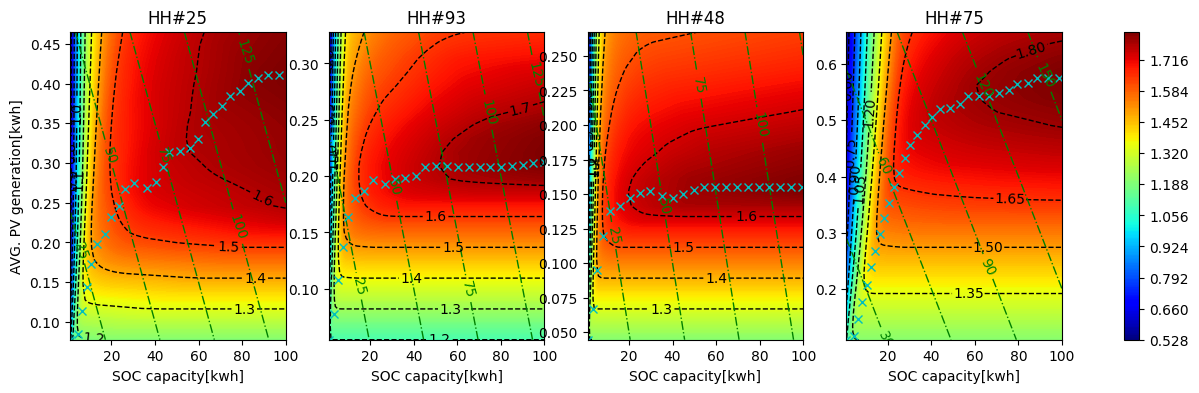

In [9]:
import matplotlib.pyplot as plt
import numpy as np

selected = [25, 93, 48, 75]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)
WW = np.linspace(0.2, 1.2, num=24)
WX = np.linspace(1, MAX_BATT, num=MAX_BATT)

fig, axes = plt.subplots(nrows=1, ncols=len(selected), figsize=(16,4))
fig.set_facecolor('white')

for i, (s, df) in enumerate(zip(selected, df_sel)):
    gc_mean = df['GC'].mean()
    gg_mean = df['GG'].mean()
    
    WY = WW * gc_mean
    print(gg_mean, gc_mean)
    X, Y = np.meshgrid(WX, WY)
    Z1 = np.zeros((len(WY), len(WX)))
    Z2 = np.zeros((len(WY), len(WX)))
    WY /= gg_mean
    for j, w in enumerate(WY):
        for k, c in enumerate(WX):
            sc, ss = factor_sssc(df['GG'].values*w, df['GC'].values, c)
            Z1[j][k] = sc + ss
            Z2[j][k] = C_b*c + C_p*w*gg_mean
        
    contour11 = axes[i].contour(X, Y, Z1, levels=10, colors='k', linewidths=1, linestyles='--') 
    contour12 = axes[i].contourf(X, Y, Z1, levels=256, cmap='jet')    
    axes[i].clabel(contour11, contour11.levels, inline=True)

    contour21 = axes[i].contour(X, Y, Z2, levels=5, colors='g', linewidths=1, linestyles='-.') 
    axes[i].clabel(contour21, contour21.levels, inline=True)

    optlist = optimize_scss(s, df)
    axes[i].plot(optlist[:, 0], optlist[:, 1], 'cx')
    axes[i].set_title(f'HH#{s}')
    axes[i].set_xlabel(f'SOC capacity[kwh]')

axes[0].set_ylabel(f'AVG. PV generation[kwh]')
fig.colorbar(contour12, ax=axes) 

budget 4.877506849315068 106.53008219178082
4 [1.         0.03877507] -1.0707262381156166
9 [3.0560184  0.05943982] -1.1476339935295536
14 [4.95410462 0.09045895] -1.2138404367237632
19 [7.00134389 0.11998656] -1.2795869952153112
24 [9.07106444 0.14928936] -1.3403793604202825
29 [11.27419156  0.17725808] -1.3929460555929933
34 [13.74552523  0.20254475] -1.4333975525956195
39 [17.69509806  0.21304902] -1.4637320505912859
44 [20.54572544  0.23454275] -1.489461135835956
49 [24.05414451  0.24945855] -1.515022796198215
54 [27.56333886  0.26436661] -1.538973358468584
59 [31.39552102  0.27604479] -1.5568686876728972
64 [37.04416369  0.26955836] -1.5679454990222466
69 [41.39498474  0.27605015] -1.5759142862538642
74 [44.27129059  0.29728709] -1.5823774290339458
79 [47.54633049  0.3145367 ] -1.5905962028057685
84 [52.5155924   0.31484408] -1.5967409073083112
89 [56.91834765  0.32081652] -1.6019655102808539
94 [60.    0.34] -1.605496200459187
99 [60.    0.39] -1.6046034017790451
budget 3.7351449

/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


53 [33.18250897  0.19817491] -1.6664034245420387
58 [38.18248067  0.19817519] -1.6769582555513953
63 [42.8205131   0.20179487] -1.685760196871748
68 [47.21840972  0.2078159 ] -1.693897020811396
73 [52.12195421  0.20878046] -1.7005254978323865
78 [57.09758017  0.2090242 ] -1.7066707689673368
83 [60.    0.23] -1.7056500440040216
budget 4.013632420091325 96.16358904109589
4 [1.         0.03013632] -1.099504883412475
9 [2.77409252 0.06225907] -1.1979720087633288
14 [4.89537569 0.09104624] -1.287693564673741
19 [7.04845521 0.11951545] -1.3743572545095089
24 [9.16500671 0.14834993] -1.4594100061534125
29 [11.39299186  0.17607008] -1.5358926809786038
34 [14.18966275  0.19810337] -1.595888203892971
39 [17.56984087  0.21430159] -1.6387960881171004
44 [21.84798811  0.22152012] -1.6708565834092357
49 [26.12216796  0.22877832] -1.6941738800889166
54 [30.7502751   0.23249725] -1.7093720773176195
59 [35.94658439  0.23053416] -1.7188514355209672
64 [41.02569141  0.22974309] -1.7249061175932359
69 [46

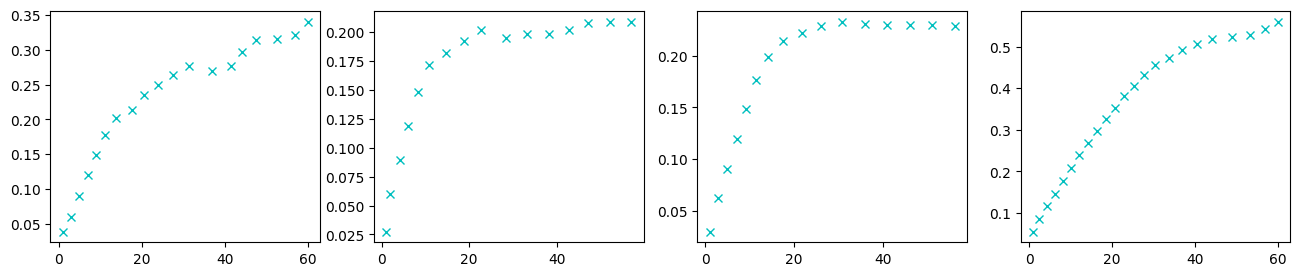

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import utils

C_b = 1
C_p = 100

def factor_sssc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    sc = 1 - grid_exp/pv.sum()
    ss = 1 - grid_imp/ld.sum() 

    return sc, ss

def cost_fun(x, df, budget):
    w = x[1]/ df['GG'].mean()
    sc, ss = factor_sssc(df['GG'].values*w, df['GC'].values, x[0])
    cost = -(sc + ss)
    return cost

def constraint_0(x, df, budget):
    cost = (C_b*x[0] + C_p*x[1])
    # print('constraint_0', x, cost)
    return cost - budget

def optimize_scss(s, df):
    w = df['GC'].mean()
    x0 = [1, 0.1*w]
    bnds = ((1, 60), (0.1*w, 1.2*w))
    min_budget = 1*C_b + 0.1*w*C_p
    max_budget = 60*C_b + 1.2*w*C_p
    print('budget', min_budget, max_budget)
    optimal_values = []
    pre_cost = 0
    for b in range(int(min_budget), int(max_budget), 5):
        arguments = (df,b)
        constraints = ({'type': 'eq', "fun": constraint_0, 'args':arguments})
        options = {'disp':False, 'maxiter':5000}
        res = scipy.optimize.minimize(cost_fun, x0, bounds=bnds, args=arguments, constraints=constraints, method="SLSQP", options=options)
        print(b, res.x, res.fun)

        if pre_cost < res.fun: break
        pre_cost = res.fun
        optimal_values.append([res.x[0], res.x[1], b])

    vlist = np.array(optimal_values)
    return vlist
        
selected = [25, 93, 1, 75]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=1, ncols=len(selected), figsize=(16,3))

for i, (s, df) in enumerate(zip(selected, df_sel)):
    vlist = optimize_scss(s, df)    
    axes[i].plot(vlist[:, 0], vlist[:, 1], 'cx')

 
    
